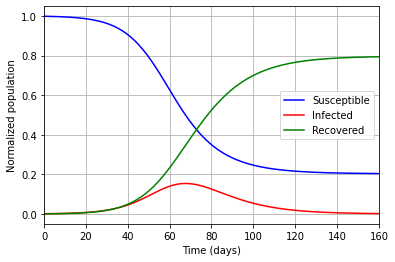

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Total population, N
N = 1000

# Initial number of infected and recovered individuals
I0 , R0 = 1, 0

# Susceptible to infection (initially)
S0 = N - I0 - R0

# beta, gamma
beta, gamma = 0.2, 1./10

# timeline (in days)
t = np.linspace(0,160,160)

# SIR model ODEs
def deriv(y, t, N, beta, gamma):
    '''System of ODEs that describes the SIR model. Variables that are solved for are: S, I, R'''
    S, I, R = y
    
    dSdt = -beta * S * I/N
    dIdt = beta * S * I/N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over time
result = odeint(deriv, y0, t, args=(N,beta,gamma))

# decomposing result into S, I, R variables
S, I, R = result.T

# Plotting instructions for the curves of S(t), I(t), R(t)
plt.figure()
plt.plot(t, S/N, 'b', label='Susceptible')
plt.plot(t, I/N, 'r', label='Infected')
plt.plot(t, R/N, 'g', label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Normalized population')
plt.legend()
plt.grid()
plt.xlim(t[0], t[-1])
plt.show()




